# Информация о покупателях с добавлением меток классов (olist_classified_public_dataset.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import sys, os
import pathlib
from pathlib import Path
from pydantic import ValidationError
from olist_churn_prediction.paths import SRC_DIR, PROCESSED_DIR, INTERIM_DIR

In [2]:
sys.path.append(str(SRC_DIR))

In [3]:
from olist_churn_prediction import feature_processing, feature_engineering
from olist_churn_prediction.schemas_raw import MainClassifiedSchemaRaw
from olist_churn_prediction.paths import RAW_DIR

In [4]:
print(SRC_DIR)

C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\src


In [5]:
print(pathlib.Path.cwd())

C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\notebooks\preprocessing


In [6]:
df = pd.read_csv(RAW_DIR / "olist_classified_public_dataset.csv", low_memory=False)

for i, row in df.head(5).iterrows():
    try:
        MainClassifiedSchemaRaw.model_validate(row.to_dict())
    except ValidationError as e:
        print(f"\nRow {i}:\n{e}\n")


Row 0:
1 validation error for MainClassifiedSchemaRaw
customer_zip_code_prefix
  Input should be a valid string [type=string_type, input_value=308, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


Row 1:
1 validation error for MainClassifiedSchemaRaw
customer_zip_code_prefix
  Input should be a valid string [type=string_type, input_value=377, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


Row 2:
1 validation error for MainClassifiedSchemaRaw
customer_zip_code_prefix
  Input should be a valid string [type=string_type, input_value=122, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


Row 3:
1 validation error for MainClassifiedSchemaRaw
customer_zip_code_prefix
  Input should be a valid string [type=string_type, input_value=140, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


Row 4:
1 va

In [7]:
classified_data = feature_processing.load_data(RAW_DIR / "olist_classified_public_dataset.csv",
                      schema = MainClassifiedSchemaRaw,
                      validate = True) # в проде можно False

In [8]:
display(classified_data.head())
classified_data.shape

,Unnamed: 0,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,0,1,delivered,89.989998,14.380000,1,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,1,2,delivered,69.000000,15.230000,1,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,2,3,delivered,99.800003,15.860000,2,4,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,3,4,delivered,87.000000,12.740000,1,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,4,5,delivered,99.900002,17.950001,1,2,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


(3584, 34)

In [9]:
print(classified_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Unnamed: 0                     3584 non-null   int64              
 1   id                             3584 non-null   Int64              
 2   order_status                   3584 non-null   string             
 3   order_products_value           3584 non-null   float32            
 4   order_freight_value            3584 non-null   float32            
 5   order_items_qty                3584 non-null   Int64              
 6   order_sellers_qty              3584 non-null   Int64              
 7   order_purchase_timestamp       3584 non-null   datetime64[ns]     
 8   order_aproved_at               3584 non-null   datetime64[ns]     
 9   order_estimated_delivery_date  3584 non-null   datetime64[ns]     
 10  order_delivered_customer

### Пояснения к признакам:
1. *id* - id;
2. *order_status* - статус заказа;
3. *order_products_value* - суммарная стоимость товаров в заказе;
4. *order_freight_value* - стоимость доставки;
5. *order_items_qty* - количество товаров в заказе;
6. *order_sellers_qty* - неясно, пояснений от заказчика нет, лучше удалить;
7. *order_purchase_timestamp* - время покупки;
8. *order_aproved_at* - время подтверждения заказа;
9. *order_estimated_delivery_date* - ожидаемая дата доставки;
10. *order_delivered_customer_date* - время доставки;
11. *customer_city* - город покупателя;
12. *customer_state* - штат (регион) покупателя;
13. *customer_zip_code_prefix* - число принадлежности к определенному региону для покупателя (аналог почтового индекса);
14. *product_category_name* - название категории товара;
15. *product_name_lenght* - длина названия товара в символах;
16. *product_description_lenght* - длина описания товара в символах;
17. *product_photos_qty* - количество фото товара;
18. *review_score* - оценка товара по пятибальной шкале;
19. *review_comment_title* - все значения NaN, удалить;
20. *review_comment_message* - обзор на товар;
21. *review_creation_date* - дата создания анкеты для пользователя с целью оценить качество услуг;
22. *review_answer_timestamp* - дата ответа пользователем на анкету;
23. *votes_before_estimate* - голоса экспертов за то, что товар приехал ранее ориентировочного срока;
24. *votes_delayed* - голоса экспертов за опоздание товара;
25. *votes_low_quality* - голоса экспертов за низкое качество товара;
26. *votes_return* - голоса экспертов за то, был ли возвращен товар на основе содержания комментария к этому товару;
27. *votes_not_as_anounced* - голоса экспертов за несоответствие товара ожиданию;
28. *votes_partial_delivery* - голоса экспертов за факт доставки неполной комплектации товара;
29. *votes_other_delivery* - не до конца ясно, предположительно, доставка неправильного вида;
30. *votes_other_order* - голоса за получение неправильного заказа;
31. *votes_satisfied* - голоса за то, удовлетворен ли покупатель;
32. *most_voted_subclass* - второй по количеству голосов класс комментария пользователя;
33. *most_voted_class* - первый по количеству голосов класс.

#### Типы данных приводятся к рекомендуемым с помощью pydantic.

#### Удалим *unnamed: 0*, *id* и *review_comment_title*. *Unnamed: 0* и *id* не несут информации, *review_comment_title* - все значения пропущены.

In [10]:
df = classified_data.copy()

In [11]:
df = df.drop(['id', 'Unnamed: 0', 'review_comment_title'], axis=1)

#### Признак *order_sellers_qty* несет неизвестную нам информацию. Решено удалить для интерпретируемости.

In [12]:
df = df.drop('order_sellers_qty', axis=1)

#### Разделим признаки на 3 группы: категориальные, численные (+ дискретные) и временные. В списке texts будут тексты.

In [13]:
texts = ['review_comment_message']
categorical_features = df.select_dtypes(include=["object", "string"]).columns.drop(texts).tolist()
numeric_features = df.select_dtypes(include=["int", "float"]).columns.tolist()
time_features = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()

In [14]:
display(categorical_features)

['order_status',
 'customer_city',
 'customer_state',
 'customer_zip_code_prefix',
 'product_category_name',
 'most_voted_subclass',
 'most_voted_class']

#### Углубимся в природу пропусков:

In [15]:
print(df.isna().sum())

order_status                       0
order_products_value               0
order_freight_value                0
order_items_qty                    0
order_purchase_timestamp           0
order_aproved_at                   0
order_estimated_delivery_date      0
order_delivered_customer_date    117
customer_city                      0
customer_state                     0
customer_zip_code_prefix           0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
review_score                       0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
votes_before_estimate              0
votes_delayed                      0
votes_low_quality                  0
votes_return                       0
votes_not_as_anounced              0
votes_partial_delivery             0
votes_other_delivery               0
votes_other_order                  0
v

In [16]:
print(df['most_voted_class'].value_counts())

most_voted_class
satisfeito_com_pedido     1983
problemas_de_entrega       950
problemas_de_qualidade     480
Name: count, dtype: int64


In [17]:
print(df['most_voted_subclass'].value_counts())

most_voted_subclass
satisfeito                1491
antes_prazo                492
atrasado                   434
entrega_parcial            401
diferente_do_anunciado     163
baixa_qualidade            149
devolucao                  134
outro_entrega              115
outro_pedido                34
Name: count, dtype: int64


#### Пропуски в этих признаках говорят о том, что эксперты не договорились, какому классу принадлежит комментарий. Не будем удалять, а проведем собственный анализ немного позже.

#### Пропуски в признаке *order_delivery_customer_date* являются следствием еще не доставленных заказов. Удалим, так как нас интересует в первую очередь удовлетворенность покупателей заказом, а здесь эта информация отсутствует.

In [18]:
df.shape

(3584, 30)

In [19]:
df = df.dropna(subset=['order_delivered_customer_date'])

In [20]:
df.shape

(3467, 30)

## Временные признаки

#### Посмотрим time-фичи:

In [21]:
display(df[time_features].head())
df[time_features].dtypes

,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,review_creation_date,review_answer_timestamp
0,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,2017-09-09,2017-09-10 03:27:54+00:00
1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,2017-09-30,2017-10-03 05:34:20+00:00
2,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,2018-01-24,2018-02-02 17:42:43+00:00
3,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,2018-02-21,2018-02-22 02:09:12+00:00
4,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,2017-12-20,2017-12-23 04:17:03+00:00


order_purchase_timestamp              datetime64[ns]
order_aproved_at                      datetime64[ns]
order_estimated_delivery_date         datetime64[ns]
order_delivered_customer_date         datetime64[ns]
review_creation_date                  datetime64[ns]
review_answer_timestamp          datetime64[ns, UTC]
dtype: object

#### Удалим часовые пояса с признаков

In [22]:
for col in df[time_features].columns:
    if pd.api.types.is_datetime64tz_dtype(df[col]):
        df[col] = df[col].dt.tz_localize(None)

C:\Users\Вячеслав\AppData\Local\Temp\ipykernel_25916\2898966975.py:2: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df[col]):


#### Типы уже были приведены к правильным.

#### Создадим краткую сводку в таблице:

In [23]:
def datetime_summary(df: pd.DataFrame, cols: list[str] | None = None, as_days: bool = True) -> pd.DataFrame:
    stats = []
    for c in cols:
        col_min = df[c].min()
        col_max = df[c].max()
        delta = col_max - col_min
        if as_days:
            delta = delta / pd.Timedelta(days=1)  # float in days
        stats.append({"feature": c,
                      "min": col_min,
                      "max": col_max,
                      "range": delta})

    return pd.DataFrame(stats).sort_values("feature", ignore_index=True)

In [24]:
datetime_summary(df, time_features, True)

,feature,min,max,range
0,order_aproved_at,2017-02-22 19:10:13.808801,2018-04-12 08:32:30.966241,413.557143
1,order_delivered_customer_date,2017-03-10 07:27:38.850482,2018-05-09 21:33:21.272362,425.587297
2,order_estimated_delivery_date,2017-03-30 00:00:00.000000,2018-05-17 00:00:00.000000,413.000000
3,order_purchase_timestamp,2017-02-22 18:56:05.000000,2018-04-11 14:51:31.000000,412.830162
4,review_answer_timestamp,2017-05-01 07:30:41.000000,2018-04-19 15:02:53.000000,353.314028
5,review_creation_date,2017-03-11 00:00:00.000000,2018-04-18 00:00:00.000000,403.000000


#### Имеем следующую информацию о временных признаках:
1. Первое значение в датасете датируется 22 февраля 2017 года, а последнее - 17 мая 2018 года.
2. Имеем данные за промежуток примерно 1 год и 2 месяца.

## Целевая переменная

#### Цель проекта - предсказание оттока клиентов, однако изначально в наших данных нет метки того, ушел клиент или нет. В таком случае сами создадим эту метку применив следующие возможные подходы :
1. Можно взять дату и время последней покупки клиента. Если покупка была сделана более чем 'X' дней назад, то метка класса будет '0', иначе '1'. Протестируем значения 60, 90 и 120 дней.
2. Эмпирически найти перцентили ("95% клиентов совершают следующую покупку через 120 дней, а значит, если покупка не произошла за 120 дней, то клиент ушел").

#### Создавать переменную будем позже на основе главного датасета - olist_public_dataset_v2.csv

## Категориальные признаки

#### С помощью кастомной функции lowercase_categoricals приведем переменные всех категориальных типов к нижнему регистру и заменим пробелы на нижние подчеркивания.

In [25]:
feature_processing.lowercase_categoricals(df, cat_cols=categorical_features, inplace=True)

,order_status,order_products_value,order_freight_value,order_items_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,delivered,89.989998,14.380000,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,belo_horizonte,mg,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,delivered,69.000000,15.230000,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,pocos_de_caldas,mg,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,delivered,99.800003,15.860000,2,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,sao_jose_dos_campos,sp,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,delivered,87.000000,12.740000,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,ribeirao_preto,sp,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,delivered,99.900002,17.950001,1,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,rio_de_janeiro,rj,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,delivered,35.000000,7.780000,1,2018-02-12 16:07:34,2018-02-12 16:27:39.816713,2018-02-26,2018-02-15 19:16:54.139873,cotia,sp,...,0,1,0,0,0,0,0,2,satisfeito,satisfeito_com_pedido
3580,delivered,39.900002,15.100000,1,2017-05-11 12:29:55,2017-05-11 13:05:49.204273,2017-05-31,2017-05-16 14:17:47.915865,mogi_das_cruzes,sp,...,0,0,0,0,0,0,0,1,antes_prazo,satisfeito_com_pedido
3581,delivered,795.000000,21.330000,1,2017-05-21 20:15:25,2017-05-23 03:42:32.806938,2017-06-13,2017-05-30 14:14:50.522442,araxa,mg,...,0,0,0,0,0,0,0,2,satisfeito,satisfeito_com_pedido
3582,delivered,72.900002,35.830002,1,2017-09-29 16:05:14,2017-09-29 16:27:57.145051,2017-11-13,2017-10-25 03:35:57.037048,braganca,pa,...,2,0,0,0,0,0,0,1,atrasado,problemas_de_entrega


In [26]:
display(df[categorical_features].head())
df[categorical_features].dtypes

,order_status,customer_city,customer_state,customer_zip_code_prefix,product_category_name,most_voted_subclass,most_voted_class
0,delivered,belo_horizonte,mg,308,beleza_saude,satisfeito,satisfeito_com_pedido
1,delivered,pocos_de_caldas,mg,377,brinquedos,antes_prazo,satisfeito_com_pedido
2,delivered,sao_jose_dos_campos,sp,122,ferramentas_jardim,entrega_parcial,problemas_de_entrega
3,delivered,ribeirao_preto,sp,140,informatica_acessorios,atrasado,problemas_de_entrega
4,delivered,rio_de_janeiro,rj,205,cama_mesa_banho,entrega_parcial,problemas_de_entrega


order_status                string[python]
customer_city               string[python]
customer_state              string[python]
customer_zip_code_prefix    string[python]
product_category_name       string[python]
most_voted_subclass         string[python]
most_voted_class            string[python]
dtype: object

#### Некоторые одинаковые города с разным написанием стали одного типа (например для sao_paulo было 438, стало 478). Однако это также может означать, что были города с одинаковыми названиями, но фактически разными. Проверим данное предположение:

In [27]:
city_state_counts = (
    df
    .groupby('customer_city')['customer_state']
    .nunique()
)

conflict_cities = city_state_counts[city_state_counts > 1]

print(f"Количество «проблемных» городов: {len(conflict_cities)}")

Количество «проблемных» городов: 6


#### Действительно, такие города есть. Посмотрим внимательнее:

In [28]:
# все строки, где customer_city входит в список «конфликтных»
conflicts_df = (df
                .loc[df['customer_city'].isin(conflict_cities.index),
                        ['customer_city', 'customer_state']]
                .drop_duplicates()
                .sort_values(['customer_city', 'customer_state']))
print(conflicts_df)

     customer_city customer_state
1101      alvorada             rs
1866      alvorada             to
1826  bandeirantes             ms
447   bandeirantes             pr
86    campo_grande             al
316   campo_grande             ms
2307       itapeva             mg
844        itapeva             sp
104     sao_carlos             sc
132     sao_carlos             sp
807        valenca             ba
3431       valenca             rj


#### Используем еще одну созданную нами функцию disambiguate_city_state для разделения таких городов. Порядок работы функции описан в feature_processing.py в комментарии. Крайне желательно сделать именно обработку в функциях, так как это не единственный датасет, требующий подобные преобразования.

In [29]:
feature_processing.disambiguate_city_state(df, city_col="customer_city", state_col="customer_state", inplace=True)

,order_status,order_products_value,order_freight_value,order_items_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,delivered,89.989998,14.380000,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,belo_horizonte,mg,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,delivered,69.000000,15.230000,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,pocos_de_caldas,mg,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,delivered,99.800003,15.860000,2,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,sao_jose_dos_campos,sp,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,delivered,87.000000,12.740000,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,ribeirao_preto,sp,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,delivered,99.900002,17.950001,1,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,rio_de_janeiro,rj,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,delivered,35.000000,7.780000,1,2018-02-12 16:07:34,2018-02-12 16:27:39.816713,2018-02-26,2018-02-15 19:16:54.139873,cotia,sp,...,0,1,0,0,0,0,0,2,satisfeito,satisfeito_com_pedido
3580,delivered,39.900002,15.100000,1,2017-05-11 12:29:55,2017-05-11 13:05:49.204273,2017-05-31,2017-05-16 14:17:47.915865,mogi_das_cruzes,sp,...,0,0,0,0,0,0,0,1,antes_prazo,satisfeito_com_pedido
3581,delivered,795.000000,21.330000,1,2017-05-21 20:15:25,2017-05-23 03:42:32.806938,2017-06-13,2017-05-30 14:14:50.522442,araxa,mg,...,0,0,0,0,0,0,0,2,satisfeito,satisfeito_com_pedido
3582,delivered,72.900002,35.830002,1,2017-09-29 16:05:14,2017-09-29 16:27:57.145051,2017-11-13,2017-10-25 03:35:57.037048,braganca,pa,...,2,0,0,0,0,0,0,1,atrasado,problemas_de_entrega


In [30]:
city_state_counts = (
    df
    .groupby('customer_city')['customer_state']
    .nunique()
)

conflict_cities = city_state_counts[city_state_counts > 1]

print(f"Количество «проблемных» городов: {len(conflict_cities)}")

Количество «проблемных» городов: 0


#### value_counts() для категориальных признаков:

In [31]:
for col in categorical_features:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- order_status ---
order_status
delivered    3467
Name: count, dtype: Int64

--- customer_city ---
customer_city
sao_paulo         458
rio_de_janeiro    266
belo_horizonte     77
brasilia           72
salvador           61
                 ... 
alagoinha           1
sao_rafael          1
bastos              1
lagarto             1
adamantina          1
Name: count, Length: 884, dtype: Int64

--- customer_state ---
customer_state
sp    1324
rj     485
mg     433
rs     181
pr     157
ba     145
sc     115
go      77
pe      73
df      72
es      69
pa      58
ce      53
mt      41
ma      39
al      23
rn      21
pb      21
pi      21
ms      17
se      16
to      10
ro       7
am       5
ac       3
rr       1
Name: count, dtype: Int64

--- customer_zip_code_prefix ---
customer_zip_code_prefix
227    52
130    49
132    37
122    33
134    29
       ..
574     1
276     1
641     1
830     1
482     1
Name: count, Length: 677, dtype: Int64

--- product_category_name ---
product_catego

#### Распределения значений категориальных признаков достаточно чистые. Присоединим переведенные названия категорий товаров:

In [32]:
translation = pd.read_csv(RAW_DIR / "product_category_name_translation.csv", low_memory=False)

In [33]:
display(translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Используем left join, где левый датасет - classified_data.

In [34]:
df = df.merge(translation, how='left', on='product_category_name')

In [35]:
df = df.drop('product_category_name', axis=1)

In [36]:
display(df.head())

,order_status,order_products_value,order_freight_value,order_items_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,...,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class,product_category_name_english
0,delivered,89.989998,14.380000,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,belo_horizonte,mg,...,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido,health_beauty
1,delivered,69.000000,15.230000,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,pocos_de_caldas,mg,...,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido,toys
2,delivered,99.800003,15.860000,2,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,sao_jose_dos_campos,sp,...,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega,garden_tools
3,delivered,87.000000,12.740000,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,ribeirao_preto,sp,...,0,0,0,0,0,0,0,atrasado,problemas_de_entrega,computers_accessories
4,delivered,99.900002,17.950001,1,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,rio_de_janeiro,rj,...,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega,bed_bath_table


# Численные признаки

In [37]:
display(df[numeric_features].head())

,order_products_value,order_freight_value,order_items_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
0,89.989998,14.380000,1,59,492,3,5,0,0,0,0,0,0,0,0,3
1,69.000000,15.230000,1,50,679,4,5,3,0,0,0,0,0,0,0,0
2,99.800003,15.860000,2,59,341,2,1,0,0,0,0,0,3,0,0,0
3,87.000000,12.740000,1,45,411,1,4,0,3,0,0,0,0,0,0,0
4,99.900002,17.950001,1,60,189,1,3,0,0,0,0,0,3,0,0,0


В данных можно увидеть признаки с названием votes_... . Это признаки, показывающие какое количество независимых экспертов проголосовали 'за'. Например, признак *votes_low_quality* показывает количество голосов экспертов за то, что комментарий содержал недовольство по поводу низкого качества товара. Судя по данным есть всего 3 разных эксперта, и каждый отдает голос максимум за один из votes-признаков на основе эмоциональной окраски комментария к товару. В таком случае логичным решением будет по наибольшему числу голосов для каждой записи создать классы принадлежности. Подробности в ноутбуке interim_feature_engineering.ipynb.

In [38]:
votes_features = ['votes_before_estimate', 'votes_delayed', 'votes_low_quality',
                  'votes_return', 'votes_not_as_anounced', 'votes_partial_delivery',
                  'votes_other_delivery', 'votes_other_order', 'votes_satisfied']

In [39]:
display(df[votes_features].head())

,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
0,0,0,0,0,0,0,0,0,3
1,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,3,0,0,0
3,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,3,0,0,0


In [40]:
for col in votes_features:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- votes_before_estimate ---
votes_before_estimate
0    2813
3     291
2     205
1     158
Name: count, dtype: int64

--- votes_delayed ---
votes_delayed
0    2971
3     267
1     127
2      97
6       3
5       1
4       1
Name: count, dtype: int64

--- votes_low_quality ---
votes_low_quality
0    3213
1     106
3      77
2      71
Name: count, dtype: int64

--- votes_return ---
votes_return
0    3209
1     129
2      79
3      48
4       2
Name: count, dtype: int64

--- votes_not_as_anounced ---
votes_not_as_anounced
0    3203
1     101
2      83
3      74
4       2
6       2
5       2
Name: count, dtype: int64

--- votes_partial_delivery ---
votes_partial_delivery
0    3009
3     305
2      66
1      59
6      22
5       6
Name: count, dtype: int64

--- votes_other_delivery ---
votes_other_delivery
0    3224
1     130
2      76
3      37
Name: count, dtype: int64

--- votes_other_order ---
votes_other_order
0    3351
1      93
2      15
4       4
3       4
Name: count, dtype: int64

#### Где-то встречается больше, чем 3 оценки. Не будем углубляться в природу явления, просто будем считать эти записи равными оценкам 3 экспертов.

#### На основе этих оценок будут сделаны новые признаки. Подробности в classified_data_feature_engineering.ipynb

In [41]:
display(df.isna().sum())

order_status                       0
order_products_value               0
order_freight_value                0
order_items_qty                    0
order_purchase_timestamp           0
order_aproved_at                   0
order_estimated_delivery_date      0
order_delivered_customer_date      0
customer_city                      0
customer_state                     0
customer_zip_code_prefix           0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
review_score                       0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
votes_before_estimate              0
votes_delayed                      0
votes_low_quality                  0
votes_return                       0
votes_not_as_anounced              0
votes_partial_delivery             0
votes_other_delivery               0
votes_other_order                  0
votes_satisfied                    0
m

In [42]:
display(df[numeric_features].head())

,order_products_value,order_freight_value,order_items_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
0,89.989998,14.380000,1,59,492,3,5,0,0,0,0,0,0,0,0,3
1,69.000000,15.230000,1,50,679,4,5,3,0,0,0,0,0,0,0,0
2,99.800003,15.860000,2,59,341,2,1,0,0,0,0,0,3,0,0,0
3,87.000000,12.740000,1,45,411,1,4,0,3,0,0,0,0,0,0,0
4,99.900002,17.950001,1,60,189,1,3,0,0,0,0,0,3,0,0,0


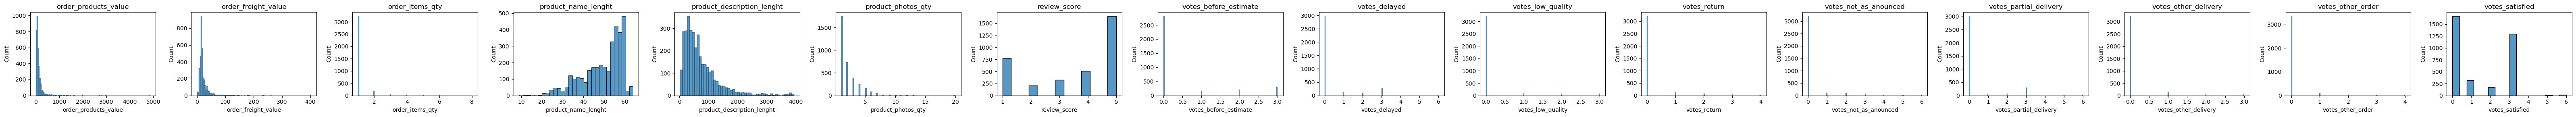

In [43]:
n = len(numeric_features)

# Настройка размера фигуры (важно для плотности)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 3))  # один ряд, n колонок

for i, col in enumerate(numeric_features):
    sns.histplot(data=df, x=col, ax=axes[i], kde=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### Можно увидеть, что в признаках с непрерывным типом переменной есть выбросы. В дискретных признаках немного разных значений, поэтому это не будет проблемой в будущем.

#### Так как в будущем предполагается использование градиентного бустинга, то и требования к данным менее требовательные, поэтому:
1. Выбросы здесь не играют большой роли.
2. Нужна правильная настройка при дисбалансе классов.
3. Крайне желательна предварительная обработка пропущенных значений.

#### Посмотрим на некоторые нелогичные значения признаков, например order_products_value = 0.

In [44]:
print(classified_data['order_products_value'].sort_values().head()) # проверка на заказы с нулевой стоимостью

2428    3.50
3516    4.52
2114    5.90
267     6.30
2699    6.90
Name: order_products_value, dtype: float32


In [45]:
print(classified_data['order_freight_value'].sort_values().head()) # проверка на размеры комиссии за доставку
print(classified_data['order_freight_value'].sort_values().tail())

956     0.00
2177    0.01
2622    0.02
1315    0.02
2799    0.08
Name: order_freight_value, dtype: float32
2753    185.479996
120     233.589996
661     236.639999
1679    259.700012
1247    401.579987
Name: order_freight_value, dtype: float32


In [46]:
print(classified_data['order_items_qty'].sort_values().head()) # проверка на количество=0 заказанных товаров
print(classified_data['order_items_qty'].sort_values().tail())

3552    1
3553    1
3554    1
3555    1
3556    1
Name: order_items_qty, dtype: Int64
1247    6
2023    6
259     6
2594    6
661     8
Name: order_items_qty, dtype: Int64


#### На первый взгляд все в порядке. Более углубленный анализ будет после добавления новых признаков в *classified_data_feature_engineering.ipynb*

In [47]:
set(df.columns) - set(classified_data.columns)

{'product_category_name_english'}

In [48]:
set(classified_data.columns) - set(df.columns)

{'Unnamed: 0',
 'id',
 'order_sellers_qty',
 'product_category_name',
 'review_comment_title'}

In [49]:
df.to_parquet(INTERIM_DIR / "classified_data_interim.parquet", index=False)